In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations as cb
import random
from collections import defaultdict
import math
import networkx as nx

In [ ]:
class CustomException(Exception):
  def __init__(self,message):
    self.message=message

  def __str__(self):
    return f"<class '{self.__class__.__name__}'> {self.message}"

class UndirectedGraph():
  def __init__(self,nodes=0):
    self.graph={}
    if nodes!=0:
      self.free=0
    else:
      self.free=1
    self.nodesnum=nodes
    self.edgesnum=0
    for i in range(1,self.nodesnum+1):
      self.graph[i]=[]

  def __str__(self):
    output= f"Graph with {self.nodesnum} nodes and {self.edgesnum} edges. Neighbours of the nodes are belows:"
    output+="\n"
    for i in self.graph.items():
      output+="Node "+str(i[0])+":{"+", ".join([str(j) for j in i[1]])+"}\n"
    return output

  def __add__(self,inp):
    if isinstance(inp, int):
      self.addNode(inp)
    elif isinstance(inp,tuple):
      self.addEdge(inp[0],inp[1])
    return self

  def addNode(self,node_num):
    try:
      if self.free==0:
        if self.nodesnum<node_num:
          raise CustomException("Node index cannot exceed number of nodes")
      else:
        self.nodesnum+=1
        self.graph[node_num]=[]
    except Exception as ce:
      print(ce)

  def addEdge(self,edge1,edge2):
    self.edgesnum+=1
    if edge1 not in self.graph:
      self.addNode(edge1)
    if edge2 not in self.graph:
      self.addNode(edge2)
    self.graph[edge1].append(edge2)
    self.graph[edge2].append(edge1)

  def plotDegDist(self):
    deg={}
    for items in self.graph.items():
      if len(items[1]) not in deg.keys():
        deg[len(items[1])]=1
      else:
        deg[len(items[1])]+=1
    xaxis=list(deg.keys())
    yaxis=[val/sum(deg.values()) for val in deg.values()]
    plt.scatter(xaxis,yaxis,marker=".",color='b',label="Actual degree distribution")
    plt.axvline(x=np.nanmean(xaxis),color='r',label="Avg. node degree")
    plt.grid(True)
    plt.xlabel("Nodes degree")
    plt.ylabel("Fraction of nodes")
    plt.title("Node Degree Distribution")
    plt.legend()
    plt.show()

  def isConnected(self):
    q=[]
    q.append(1)
    visited=[False for i in range(1,self.nodesnum+1)]
    while len(q)!=0:
      node=q.pop(0)
      visited[node-1]=True
      for neigh in self.graph[node]:
        if visited[neigh-1]==False:
          visited[neigh-1]=True
          q.append(neigh)
    if False in visited:
      return False
    else:
      return True

  def oneTwoComponentSizes(self):
    components=[]
    visited=[False for i in range(1,self.nodesnum+1)]
    while False in visited:
      q=[]
      q.append(visited.index(False)+1)
      component=[]
      while len(q)!=0:
        node=q.pop(0)
        visited[node-1]=True
        component.append(node)
        for neigh in self.graph[node]:
          if visited[neigh-1]==False:
            visited[neigh-1]=True
            q.append(neigh)
      components.append(component)
    components.sort(key=len)

    return [len(components[-1]),len(components[-2]) if len(components)>1 else 0]

class ERRandomGraph(UndirectedGraph):
  def __init__(self,nodes=0):
    super().__init__(nodes)

  def sample(self,prob):
    edges=list(cb(list(range(1,self.nodesnum+1)),2))
    for edge in edges:
      if random.random()<prob:
        self.addEdge(edge[0],edge[1])

  def plotDegDist(self):
    deg={}
    for items in self.graph.items():
      if len(items[1]) not in deg.keys():
        deg[len(items[1])]=1
      else:
        deg[len(items[1])]+=1
    #plot the vertical line before adding node degrees with 0 fraction nodes
    plt.axvline(x=np.nanmean(list(deg.keys())),color='r',label="Avg. node degree")

    for i in range(1,self.nodesnum+1):
      if i not in deg.keys():
        deg[i]=0
    xaxis=list(deg.keys())
    yaxis=[val/sum(deg.values()) for val in deg.values()]
    plt.scatter(xaxis,yaxis,marker=".",color='b',label="Actual degree distribution")
    plt.grid(True)
    plt.xlabel("Nodes degree")
    plt.ylabel("Fraction of nodes")
    plt.title("Node Degree Distribution")
    plt.legend()
    plt.show()

  def isConnectedDerived(self):
    xaxis=[]
    yaxis=[]
    for p in np.arange(0.0, 0.1, 0.01):
      connected=[]
      for i in range(1000):
        newobj=ERRandomGraph(100)
        newobj.sample(p)
        connected.append(1 if newobj.isConnected() else 0)
      xaxis.append(p)
      yaxis.append(sum(connected)/1000)
    plt.plot(xaxis,yaxis,color='b')
    plt.axvline(x=math.log(100)/100,color='r',label="Theoretical threshold")
    plt.grid(True)
    plt.xlabel("p")
    plt.ylabel("Fraction of runs connected")
    plt.title("Connectedness of a G(100, p) as function of p")
    plt.legend()
    plt.show()

  def largestcc(self):
    xaxis=[]
    yaxis1=[]
    yaxis2=[]
    for p in np.arange(0.0, 0.01, 0.001):
      componentsizel=[]
      componentsizesl=[]
      for i in range(50):
        newobj=ERRandomGraph(1000)
        newobj.sample(p)
        componentsize=newobj.oneTwoComponentSizes()
        componentsizel.append(componentsize[0]/1000)
        componentsizesl.append(componentsize[1]/1000)
      yaxis1.append(sum(componentsizel)/50)
      yaxis2.append(sum(componentsizesl)/50)
      xaxis.append(p)

    plt.plot(xaxis,yaxis2,color='b', label='second Largest connected component')
    plt.plot(xaxis,yaxis1,color='g', label='largest connected component')
    #from slides 1/n and logn/n
    plt.axvline(x=1/self.nodesnum,color='r',label="largest cc threshold")
    plt.axvline(x=math.log(self.nodesnum)/self.nodesnum,color='y',label="connectness threshold")
    plt.grid(True)
    plt.xlabel("p")
    plt.ylabel("Fraction of nodes")
    plt.title("Fraction of nodes in the largest and second-largest connected components (CC) of G(1000, p) as function of p")
    plt.legend()
    plt.show()




#g=UndirectedGraph()
#g.addNode(6)
#g.addNode(7)
#g.addEdge(6,7)
#g=g+5
#g=g+(10,11)
#g=g+(5,10)
#print(g)
#g.plotDegDist()

#g=ERRandomGraph(1000)
#g.sample(0.4)
#g.plotDegDist()

g = UndirectedGraph(5)
g =g+(1, 2)
g =g+(2, 3)
g =g+(3, 4)
g =g+(3, 5)
print(g.isConnected())

#g=ERRandomGraph(100)
#g.isConnectedDerived()

# g = UndirectedGraph(6)
# g = g + (1, 2)
# g = g + (3, 4)
# g = g + (6, 4)
# print(g.oneTwoComponentSizes())

# g = ERRandomGraph(1000)
# g.sample(0.05)
# g.largestcc()
# print(g.oneTwoComponentSizes())

True


<ipython-input-35-c87565d9d959>:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(self.g.edges(), int((1-p) * self.g.number_of_edges()))


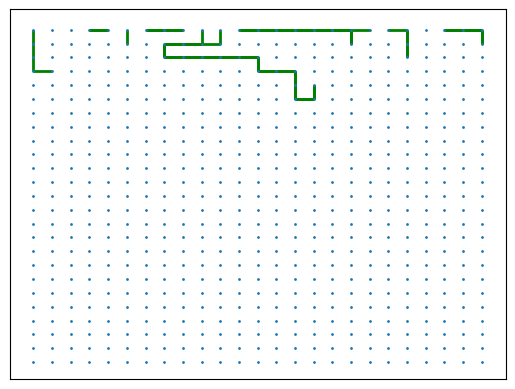

In [ ]:
class Lattice():
  def __init__(self,n=0):
    self.nodes=n
    self.g=nx.grid_2d_graph(n,n)
    self.edgecolor='none'
    self.nodesize=10

  def show(self):
    dots={(i,j):(i,j) for i,j in self.g.nodes()}
    nx.draw(self.g,dots,with_labels=False, node_size=self.nodesize,edge_color=self.edgecolor)

  def percolate(self,p):
    self.edgecolor='r'
    self.nodesize=0
    edges_to_remove = random.sample(self.g.edges(), int((1-p) * self.g.number_of_edges()))
    self.g.remove_edges_from(edges_to_remove)

  def existsTopDownPath(self):
    # Get a list of bottom nodes, which are all nodes in the top row
    bottom_nodes = [ (i,0) for i in range(self.nodes) ]
    # Get a list of top nodes, which are all nodes in the bottom row
    top_nodes = [ (i,self.nodes-1) for i in range(self.nodes) ]

    for top_node in top_nodes:
        for bottom_node in bottom_nodes:
            if nx.has_path(self.g, top_node, bottom_node):
                return True
    return False

  def showPaths(self):
    # Get a list of bottom nodes, which are all nodes in the top row
    bottom_nodes = [ (i,0) for i in range(self.nodes) ]
    # Get a list of top nodes, which are all nodes in the bottom row
    top_nodes = [ (i,self.nodes-1) for i in range(self.nodes) ]
    # Get a list of all nodes in the lattice except top and bottom nodes
    all_nodes = []
    dots={(i,j):(i,j) for i,j in self.g.nodes()}
    for i in range(self.nodes):
        for j in range(self.nodes):
            all_nodes.append((i,j))

    # For each top node, check if there is a path to any bottom node
    for u in top_nodes:
        path_exists = False
        for v in bottom_nodes:
            if nx.has_path(self.g, u, v):
                path_exists = True
                break
        if path_exists:
            # If there is a path, find the shortest path and draw it in green
            shortest_path = nx.shortest_path(self.g, u, v)
            shortest_path_edges = [(shortest_path[i],shortest_path[i+1]) for i in range(len(shortest_path)-1)]
            nx.draw_networkx_edges(self.g,dots,edgelist=shortest_path_edges,edge_color='g', width=2)
        else:
            # If there is no path to a bottom node, find the longest path to any node in the lattice except top and bottom nodes
            largest_shortest_path = [u]
            max_length = 0
            for v in all_nodes:
                if nx.has_path(self.g, u, v):
                    shortest_path = nx.shortest_path(self.g, u, v)
                    if len(shortest_path) > max_length:
                        max_length = len(shortest_path)
                        largest_shortest_path = shortest_path
            largest_shortest_path_edges = [(largest_shortest_path[i],largest_shortest_path[i+1]) for i in range(len(largest_shortest_path)-1)]
            nx.draw_networkx_edges(self.g, dots, edgelist=largest_shortest_path_edges,edge_color='g', width=2)
    # Draw all nodes in the lattice
    nx.draw_networkx_nodes(self.g, dots, node_size=1)
    # Show the graph
    plt.show()

  def conclusiongraph(self):
    xaxis=[]
    yaxis=[]
    for p in np.arange(0,1,0.1):
      pathexists=[]
      for i in range(50):
        newlattice=Lattice(100)
        newlattice.percolate(p)
        if newlattice.existsTopDownPath()==True:
          pathexists.append(1)
        else:
          pathexists.append(0)
      xaxis.append(p)
      yaxis.append(sum(pathexists)/50)
    plt.plot(xaxis,yaxis,color='b')
    plt.title("Critical cut-off in 2-D bond percolation")
    plt.ylabel("Fraction of runs end-to-end percolation occurred")
    plt.xlabel("p")
    plt.grid=True

# l=Lattice(25)
# l.percolate(0.4)
# print(l.existsTopDownPath())
# l.show()

l=Lattice(25)
l.percolate(0.4)
l.showPaths()

# l=Lattice(100)
# l.conclusiongraph()

In [ ]:
|l=[1,2,3]
print(l.pop(0))

1
